In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv('交通流量.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   路線方向    756 non-null    object
 1   路段      756 non-null    object
 2   交流道     756 non-null    object
 3   進出口     756 non-null    object
 4   週六      756 non-null    object
 5   週日      756 non-null    object
 6   週2-4    756 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


In [11]:
#檢查是null
df['週六'][0] = np.nan
df.isnull().sum()

路線方向    0
路段      0
交流道     0
進出口     0
週六      1
週日      0
週2-4    0
dtype: int64

In [14]:
df = pd.read_csv('交通流量.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   路線方向    756 non-null    object
 1   路段      756 non-null    object
 2   交流道     756 non-null    object
 3   進出口     756 non-null    object
 4   週六      756 non-null    object
 5   週日      756 non-null    object
 6   週2-4    756 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


路線方向    0
路段      0
交流道     0
進出口     0
週六      0
週日      0
週2-4    0
dtype: int64

In [23]:
def convertToInt(v):
    return 1

df['週六'].map(lambda v:1)

0      1
1      1
2      1
3      1
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: 週六, Length: 756, dtype: int64

In [25]:
df['週六'].map(lambda v:int(v))

ValueError: invalid literal for int() with base 10: '19,726'

In [26]:
def checkConvert(v):
    try:
        return int(v)
    except:
        print(v)
        return 0
df['週六'].map(checkConvert)

19,726
17,193


0      34246
1       9484
2       2108
3       6051
4      10785
       ...  
751     4612
752     6515
753    10822
754     5196
755    12946
Name: 週六, Length: 756, dtype: int64

In [28]:
myValue = '19,726'
myList = myValue.split(',')
myList
''.join(myList)

'19726'

In [32]:
def strToInt(v):
    try:
        return int(v)
    except:
        myList = v.split(',')
        newString = ''.join(myList)
        return newString

df['週六'] = df['週六'].map(strToInt)
df['週日'] = df['週日'].map(strToInt) 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   路線方向    756 non-null    object
 1   路段      756 non-null    object
 2   交流道     756 non-null    object
 3   進出口     756 non-null    object
 4   週六      756 non-null    int64 
 5   週日      756 non-null    int64 
 6   週2-4    756 non-null    object
dtypes: int64(2), object(5)
memory usage: 41.5+ KB


In [39]:
grouped = df.groupby('路線方向')[['週六','週日']]
sumResult = grouped.agg('sum')
sumResult

,週六,週日
路線方向,,
國10東向,190315,179386
國10西向,203908,212663
國1北向,2201802,2087014
國1南向,2274715,2066203
國1高架北向,294048,294671
國1高架南向,287731,265966
國2東向,339452,322930
國2西向,309509,298983
國3北向,1309358,1349691


In [44]:
series_sum = sumResult.stack()
series_sum

路線方向      
國10東向   週六     190315
        週日     179386
國10西向   週六     203908
        週日     212663
國1北向    週六    2201802
        週日    2087014
國1南向    週六    2274715
        週日    2066203
國1高架北向  週六     294048
        週日     294671
國1高架南向  週六     287731
        週日     265966
國2東向    週六     339452
        週日     322930
國2西向    週六     309509
        週日     298983
國3北向    週六    1309358
        週日    1349691
國3南向    週六    1364935
        週日    1257226
國3甲東向   週六      87002
        週日      74524
國3甲西向   週六     104507
        週日     100709
國4東向    週六     102624
        週日      98616
國4西向    週六     103744
        週日     104851
國5北向    週六     109263
        週日     110033
國5南向    週六     123497
        週日      96328
國6東向    週六      60824
        週日      52078
國6西向    週六      54810
        週日      68804
國8東向    週六      90036
        週日      89496
國8西向    週六      89276
        週日      94721
dtype: int64

In [46]:
result_series = series_sum[series_sum >= 200000]
result_series

路線方向      
國10西向   週六     203908
        週日     212663
國1北向    週六    2201802
        週日    2087014
國1南向    週六    2274715
        週日    2066203
國1高架北向  週六     294048
        週日     294671
國1高架南向  週六     287731
        週日     265966
國2東向    週六     339452
        週日     322930
國2西向    週六     309509
        週日     298983
國3北向    週六    1309358
        週日    1349691
國3南向    週六    1364935
        週日    1257226
dtype: int64

In [47]:
result_dataFrame = result_series.unstack()
result_dataFrame

,週六,週日
路線方向,,
國10西向,203908,212663
國1北向,2201802,2087014
國1南向,2274715,2066203
國1高架北向,294048,294671
國1高架南向,287731,265966
國2東向,339452,322930
國2西向,309509,298983
國3北向,1309358,1349691
國3南向,1364935,1257226


<AxesSubplot:xlabel='路線方向'>

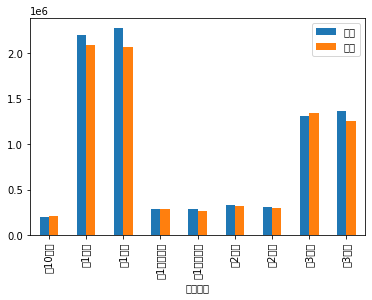

In [49]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=8)
#window font=FontProperties(fname=r'c:\windows\fonts\simsun.ttc',size=8)
figure = plt.figure()
ax1=figure.add_subplot(1,1,1)
result_dataFrame.plot(ax=ax1,kind='bar')